# Classification experiment of single (cutted) cells - 10 HPF dataset version

In [ ]:
%reload_ext autoreload
%autoreload 2
from fastai import *
from fastai.vision import *
path = Path('./')

In [ ]:
bs=16
data = ImageDataBunch.from_folder(Path('./DataSmall'),
        ds_tfms=get_transforms(), valid_pct=0.2, size=128, train='train', num_workers=4, bs=bs, test="test").normalize()

data.show_batch(rows=4)

In [3]:
data_test = (ImageList.from_folder(Path('./DataSmall/'))
        .split_by_folder(train='train', valid='test')
        .label_from_folder()).databunch().normalize()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


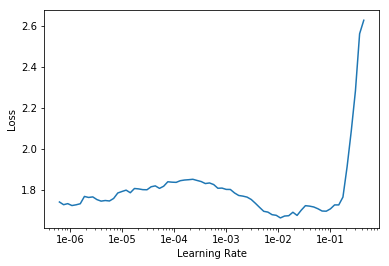

In [4]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy, callback_fns=[ShowGraph])
lr_find(learn)
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.602541,0.413465,0.839020,00:11


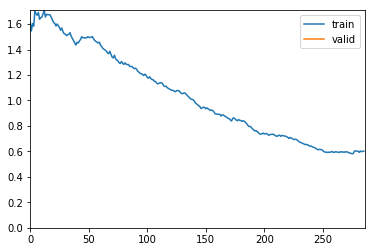

In [5]:
learn.fit_one_cycle(1,1e-2)

Unfreeze backbone of model, train for 10 epochs using cyclic learning rate scheme

epoch,train_loss,valid_loss,accuracy,time
0,0.600136,1.086813,0.793526,00:13
1,0.440030,1.971992,0.774278,00:13
2,0.406356,0.327024,0.883640,00:09
3,0.369942,0.200040,0.909011,00:08
4,0.302365,0.236901,0.904637,00:08
5,0.309776,0.598670,0.853018,00:08
6,0.219939,0.169204,0.922135,00:09
7,0.187855,0.155211,0.933508,00:09
8,0.159705,0.164174,0.926509,00:08
9,0.147523,0.158004,0.931759,00:09


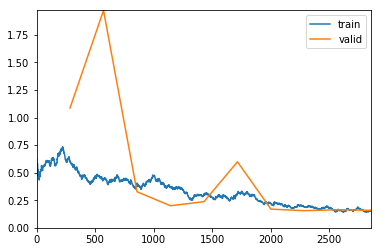

In [6]:
learn.unfreeze()
learn.fit_one_cycle(10, slice(1e-3,1e-2), pct_start=0.05)


In [7]:
learn.data = data_test
#learn.validate(data.test_dl)
interp = ClassificationInterpretation.from_learner(learn, ds_type=DatasetType.Valid)
losses,idxs = interp.top_losses()


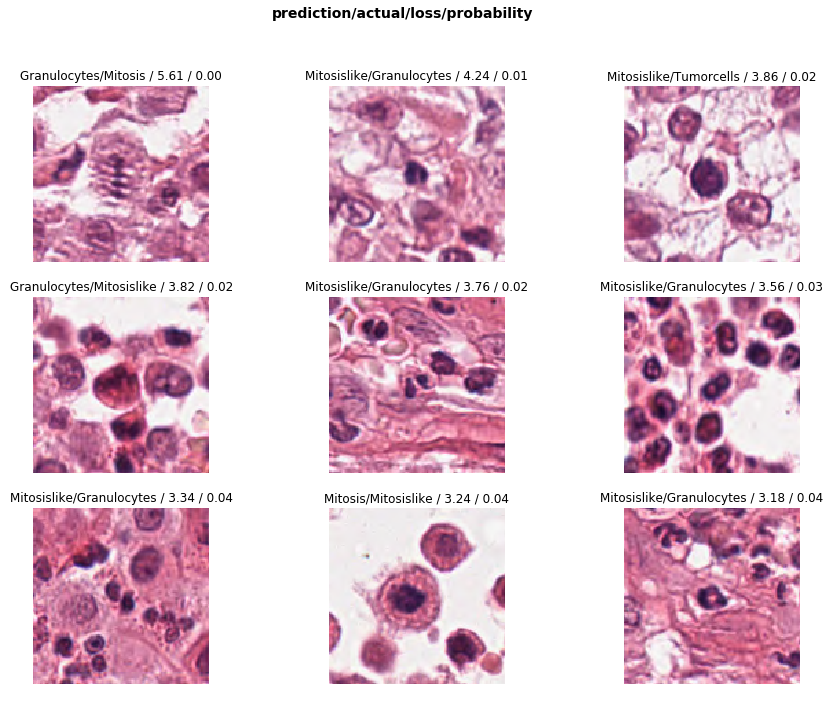

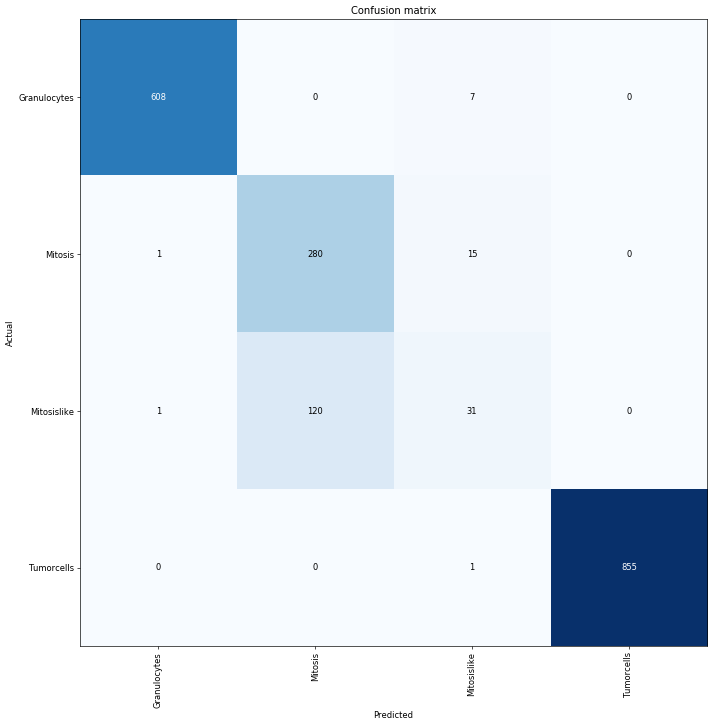

In [8]:
len(data.test_ds)==len(losses)==len(idxs)
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)


## Print confusion matrix, LaTeX style

In [9]:

print(" \\\\\n".join([" & ".join(map(str,line)) for line in interp.confusion_matrix()]))

608 & 0 & 7 & 0 \\
1 & 280 & 15 & 0 \\
1 & 120 & 31 & 0 \\
0 & 0 & 1 & 855


## Find out test accuracy

In [10]:
c = interp.confusion_matrix()
accuracy = np.sum(c*np.eye(4))/np.sum(c)
print('Test accuracy: ',accuracy)

Test accuracy:  0.9244398124022929


In [11]:
learn.save('CellClassifier_128px_10HPF.pth')
learn.export('CellClassifier_128px_10HPF.pth')